<a href="https://colab.research.google.com/github/SachinSharma6174/neural_network/blob/main/T9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "/content/drive/MyDrive/Training"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
																			rotation_range=30,
																			height_shift_range=0.2,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size = 64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size= 16
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [3]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 15
    #callbacks=[callbacks]
)

Epoch 1/50
15/15 [==============================] - 348s 23s/step - loss: 0.4952 - acc: 0.7424 - val_loss: 0.3848 - val_acc: 0.8703
Epoch 2/50
15/15 [==============================] - 44s 3s/step - loss: 0.3139 - acc: 0.8690 - val_loss: 0.2551 - val_acc: 0.9205
Epoch 3/50
15/15 [==============================] - 44s 3s/step - loss: 0.2659 - acc: 0.8941 - val_loss: 0.2920 - val_acc: 0.9121
Epoch 4/50
15/15 [==============================] - 44s 3s/step - loss: 0.2382 - acc: 0.9039 - val_loss: 0.2212 - val_acc: 0.9289
Epoch 5/50
15/15 [==============================] - 44s 3s/step - loss: 0.2410 - acc: 0.9017 - val_loss: 0.2176 - val_acc: 0.9289
Epoch 6/50
15/15 [==============================] - 44s 3s/step - loss: 0.2282 - acc: 0.9116 - val_loss: 0.2044 - val_acc: 0.9372
Epoch 7/50
15/15 [==============================] - 44s 3s/step - loss: 0.2098 - acc: 0.9258 - val_loss: 0.2239 - val_acc: 0.9331
Epoch 8/50
15/15 [==============================] - 44s 3s/step - loss: 0.2209 - acc: 0.

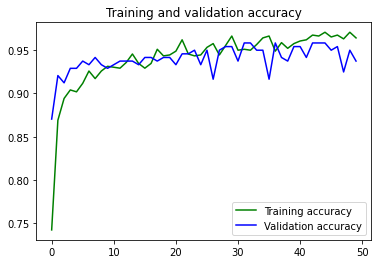

<Figure size 432x288 with 0 Axes>

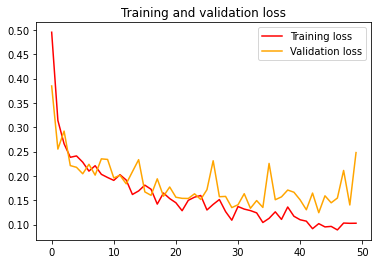

<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [28]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving sunrisesunsettime.jpeg to sunrisesunsettime (1).jpeg
True 0.99910516


In [12]:
!pip install flask-ngrok


In [19]:
!/tmp/ngrok/ngrok authtoken 25LRYelUVdA8lUkbQP4PtgZjoMk_3Af8qnYETARPmnUd5doMU

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [36]:
!/tmp/ngrok/ngrok http http://localhost:5000

In [39]:
!pip install -U flask-cors

In [ ]:
from PIL import Image
import io
from flask import Flask, request
from flask_ngrok import run_with_ngrok
from flask_cors import CORS, cross_origin
app = Flask(__name__)
cors = CORS(app)
app.config['CORS_HEADERS'] = 'Content-Type'   
run_with_ngrok(app)
# import jsonpickle
  
@app.route("/predict" , methods=['POST'])
@cross_origin()
def home():
  data = request.get_data()
  image = Image.open(io.BytesIO(data))
  print(data)
  img = image.load_img(image, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))
  response = {
      "TRUE":99,
      "FALSE":10
  }
  return response
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c73a-35-185-159-244.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [20/Feb/2022 00:37:18] "OPTIONS /predict HTTP/1.1" 200 -
[2022-02-20 00:37:18,601] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask_cors/extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/